In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
from sklearn.datasets import *
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('mammogram.csv')
df.head()

,BI_RADS_assessment,age,shape,margin,density,severity
0,5,67,3,5,3,1
1,4,43,1,1,-100000,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,-100000,1


In [3]:
#here -100000 is the null value, we have to replace with NaN .


In [4]:
df=df.replace(-100000,np.NaN)

In [5]:
df.head()

,BI_RADS_assessment,age,shape,margin,density,severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BI_RADS_assessment,959.0,4.348279,1.783031,0.0,4.0,4.0,5.0,55.0
age,956.0,55.487448,14.480131,18.0,45.0,57.0,66.0,96.0
shape,930.0,2.721505,1.242792,1.0,2.0,3.0,4.0,4.0
margin,913.0,2.796276,1.566546,1.0,1.0,3.0,4.0,5.0
density,885.0,2.910734,0.380444,1.0,3.0,3.0,3.0,4.0
severity,961.0,0.463059,0.498893,0.0,0.0,0.0,1.0,1.0


### Data Imputation

In [7]:
(df.isnull().sum()/len(df))*100

BI_RADS_assessment    0.208117
age                   0.520291
shape                 3.225806
margin                4.994797
density               7.908429
severity              0.000000
dtype: float64

In [8]:
#drop the null values
df.dropna(inplace=True)
df.head()
df.set_index(np.arange(0,830))

,BI_RADS_assessment,age,shape,margin,density,severity
0,5.0,67.0,3.0,5.0,3.0,1
1,5.0,58.0,4.0,5.0,3.0,1
2,4.0,28.0,1.0,1.0,3.0,0
3,5.0,57.0,1.0,5.0,3.0,1
4,5.0,76.0,1.0,4.0,3.0,1
5,3.0,42.0,2.0,1.0,3.0,1
6,4.0,36.0,3.0,1.0,2.0,0
7,4.0,60.0,2.0,1.0,2.0,0
8,4.0,54.0,1.0,1.0,3.0,0
9,3.0,52.0,3.0,4.0,3.0,0


In [9]:
df.shape

(830, 6)

In [10]:
(df.isnull().sum()/len(df))*100

BI_RADS_assessment    0.0
age                   0.0
shape                 0.0
margin                0.0
density               0.0
severity              0.0
dtype: float64

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BI_RADS_assessment,830.0,4.393976,1.888371,0.0,4.0,4.0,5.0,55.0
age,830.0,55.781928,14.671782,18.0,46.0,57.0,66.0,96.0
shape,830.0,2.781928,1.242361,1.0,2.0,3.0,4.0,4.0
margin,830.0,2.813253,1.567175,1.0,1.0,3.0,4.0,5.0
density,830.0,2.915663,0.350936,1.0,3.0,3.0,3.0,4.0
severity,830.0,0.485542,0.500092,0.0,0.0,0.0,1.0,1.0


In [12]:
#EDA

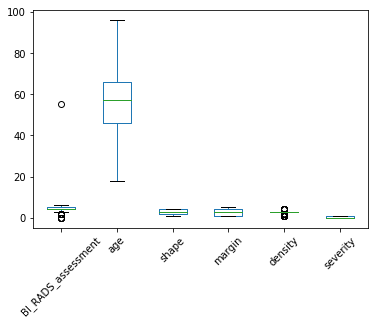

In [13]:
df.plot.box(rot=45)

In [14]:
# AS the standard deviation is within the 3sigma, no need to remove the outliers which means outliers play some
#major role in the data

[0, 1, 2, 3]


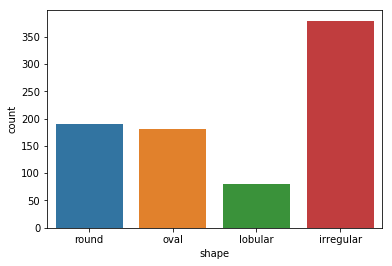

In [15]:
#how many types of shapes for tumours
sns.countplot(x='shape',data=df)
label=['round', 'oval', 'lobular','irregular']
x_pos=list(range(len(label)))
print(x_pos)
plt.xticks(x_pos,label)
plt.show()

In [16]:
#inference 
# Most of the tumour shapes are irregular  compare to others

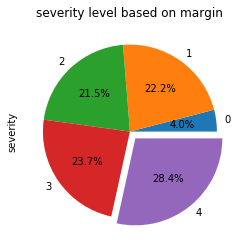

In [219]:
#margin is nothing spread of infection
df.groupby(['margin'])['severity'].agg('mean').plot.pie(explode=(0,0,0,0,0.1),autopct='%1.1f%%',rot=0)
plt.ylabel('severity')
plt.title('severity level based on margin')
plt.savefig('sm.png')

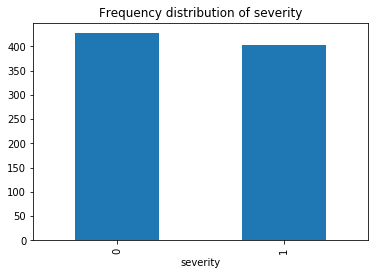

In [218]:
#understanding the frequency distribution of data in target variable "severity"
df.severity.value_counts().plot(kind='bar')
plt.xlabel('severity')
plt.title('Frequency distribution of severity')
plt.savefig('severity.png')

In [197]:
df.severity.value_counts()

0    427
1    403
Name: severity, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D84189DD30>,
      dtype=object)

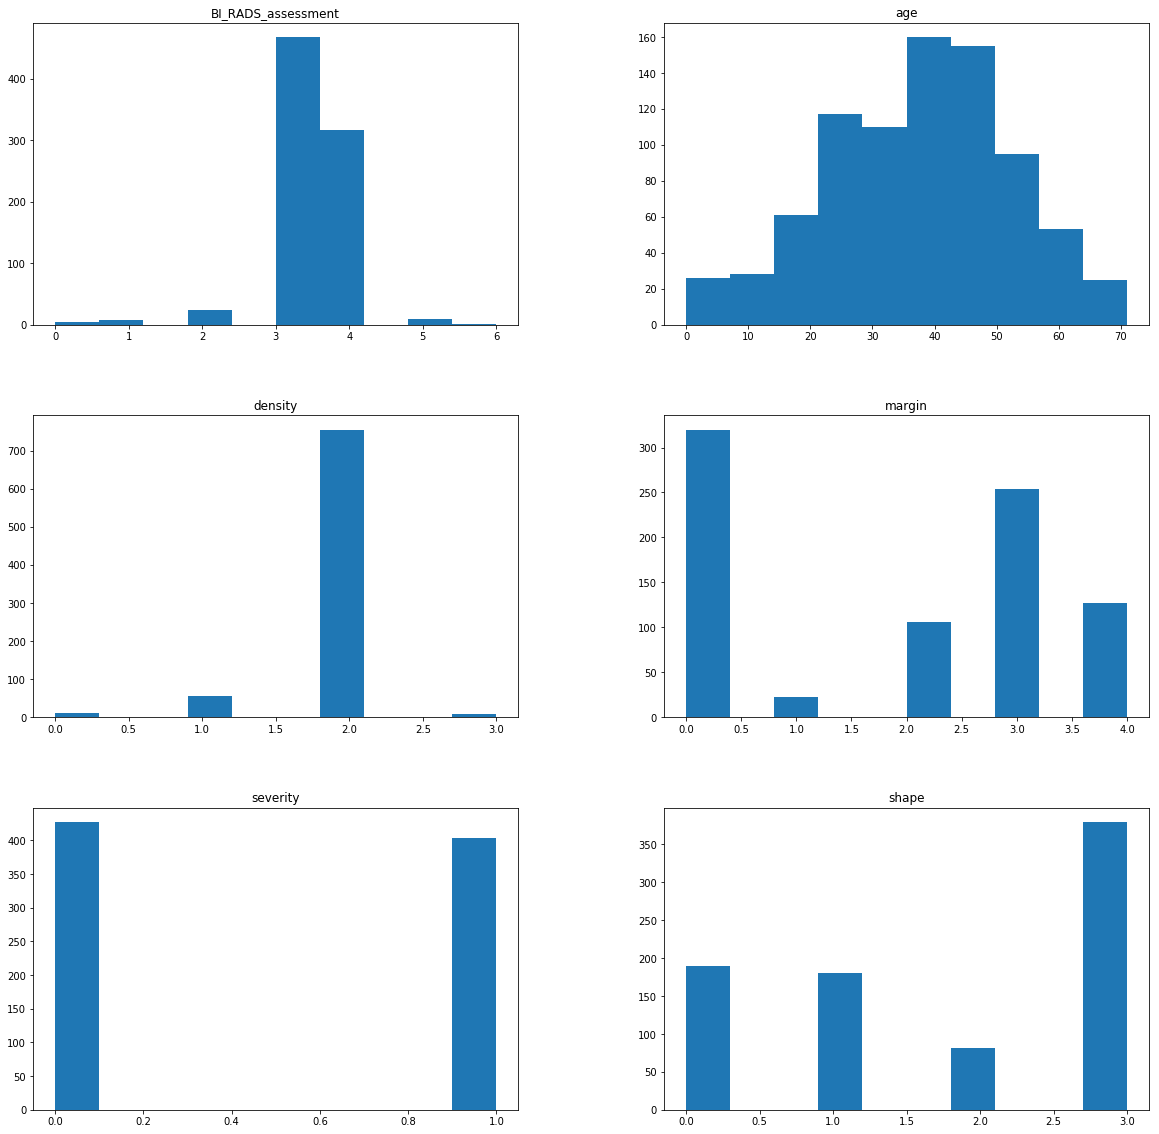

In [198]:
df.hist(bins=10,figsize=(20,20),grid=False)

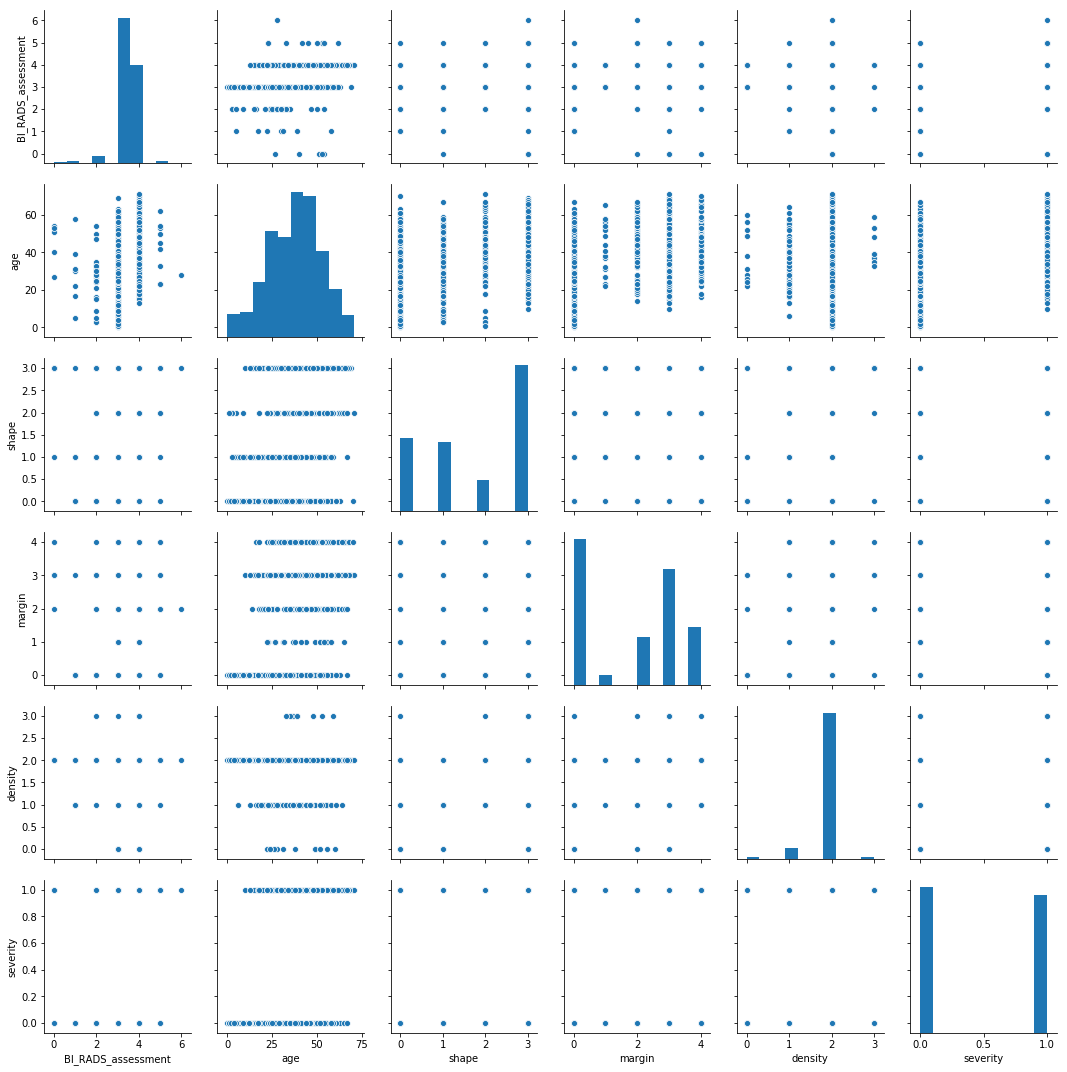

In [205]:
sns.pairplot(df.iloc[:,0:6])

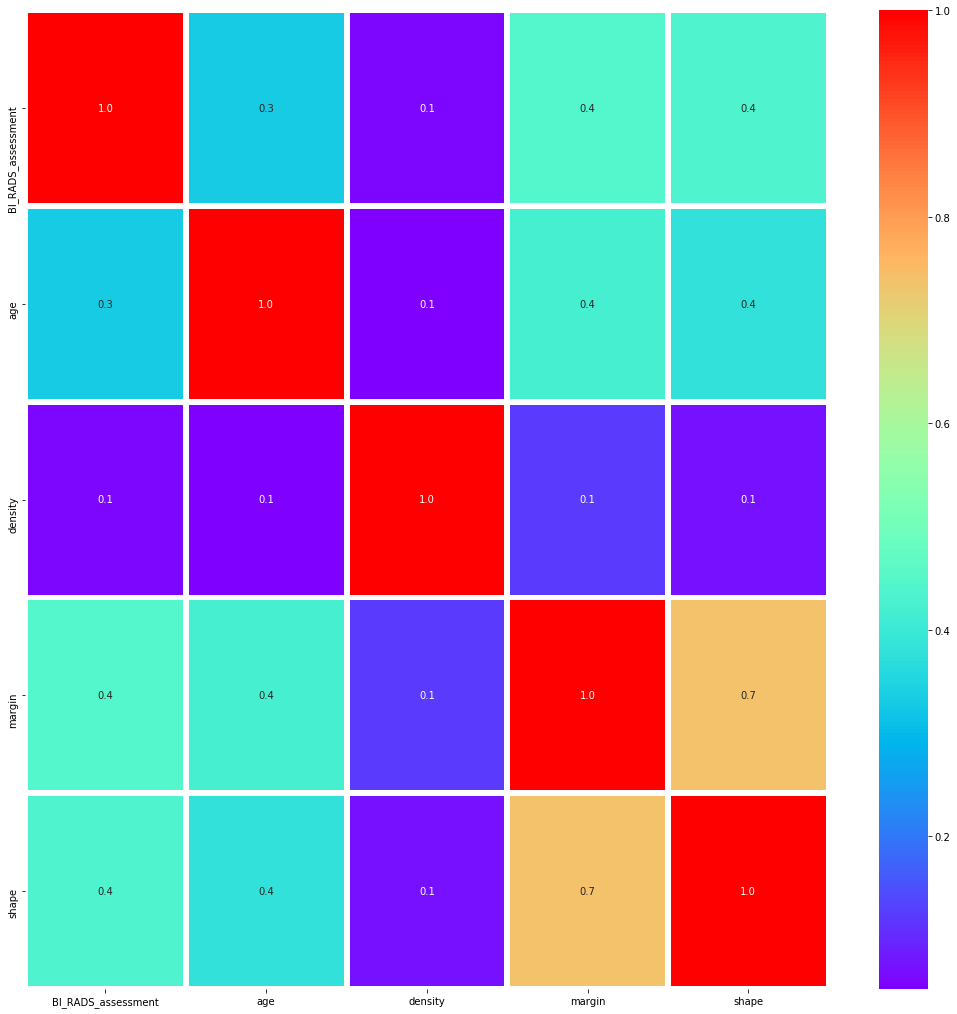

In [220]:
y=df['severity']
x=df[['BI_RADS_assessment','age','density','margin','shape']]
#corelation map
f,ax=plt.subplots(figsize=(18,18))
sns.heatmap(x.corr(),annot=True,cmap='rainbow',linewidths=5,fmt='.1f',ax=ax)
plt.savefig('corr.png')

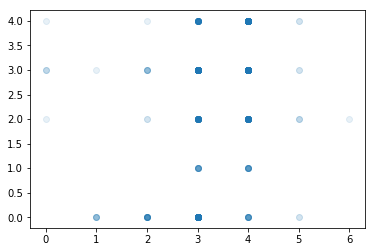

In [201]:
plt.scatter(df.BI_RADS_assessment,df.margin,alpha=0.1)

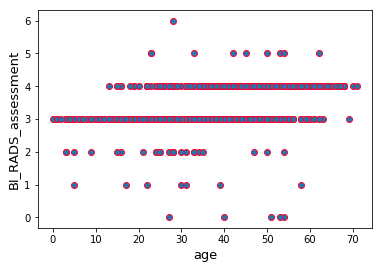

In [193]:
# create subplots
fig, ax = plt.subplots()
#create scatter plots
ax.scatter(x = df['age'], y= df['BI_RADS_assessment'],edgecolors='#fc052a')
plt.ylabel('BI_RADS_assessment', fontsize=13)
plt.xlabel('age', fontsize=13)
plt.show()

Text(0.5, 1.0, 'severity level based on margin')

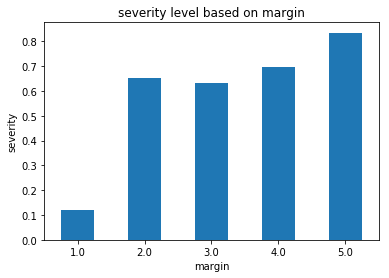

In [18]:
df.groupby(['margin'])['severity'].agg('mean').plot.bar(rot=0)
plt.ylabel('severity')
plt.title('severity level based on margin')

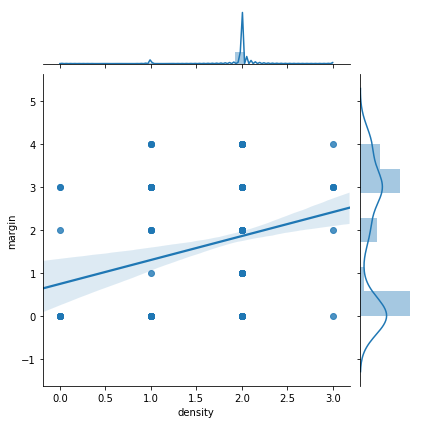

In [217]:
sns.jointplot(df.density,df.margin,data=df,kind='reg')
plt.show()

#### Logistic REgerssion

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
y=df['severity']
X=df.drop('severity',axis=1)


In [21]:
#split the dataset in to 70% train and 30% test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [22]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [23]:
y_pred=lr.predict(X_test)

In [24]:
#Model Evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from mlxtend.evaluate import confusion_matrix

In [25]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 98,  40],
       [ 10, 101]])

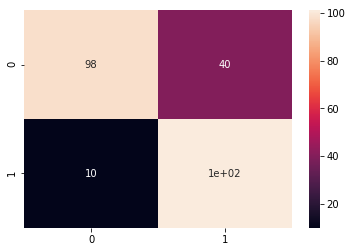

In [26]:
sns.heatmap(cm,annot=True)

TP=101,FN=40,FP=10,TN=98

In [27]:
print('classification_report:\n',classification_report(y_test,y_pred))

classification_report:
               precision    recall  f1-score   support

           0       0.91      0.71      0.80       138
           1       0.72      0.91      0.80       111

   micro avg       0.80      0.80      0.80       249
   macro avg       0.81      0.81      0.80       249
weighted avg       0.82      0.80      0.80       249



In [28]:
print('Accuracy_score:',accuracy_score(y_test,y_pred))

Accuracy_score: 0.7991967871485943


### KNN MODEL

In [29]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [30]:
y_pred=classifier.predict(X_test)

In [31]:
print('Accuracy Score:',accuracy_score(y_test,y_pred))

Accuracy Score: 0.7951807228915663


In [32]:
#K value
from sklearn.model_selection import cross_val_score

In [33]:
k_range=range(1,31)#list of scores from k_range
k_scores=[]
#1.we will loop through resonable values of k
for k in k_range:
   #2.run KNeighborsClassifier with k neighbours
   knn=KNeighborsClassifier(n_neighbors=k)
   #3.Obtain cross_val_score for KNeighborsClassifier with k neighbours
   scores=cross_val_score(knn,X,y,cv=10,scoring='accuracy')
   #4.append mean of scores for k neighbors to k_scores list
   k_scores.append(scores.mean())
print(k_scores)

[0.7540646908190253, 0.7490848411065867, 0.7961791416537228, 0.7890079481689826, 0.8167348837860151, 0.8095346542966292, 0.7975865133005893, 0.8046709486027736, 0.7927665365293928, 0.7903719407245707, 0.795205910751018, 0.7939426696332368, 0.7964254229461399, 0.8012450498859549, 0.796338664763584, 0.7903425548885437, 0.7915620670836656, 0.7988203685823434, 0.795235296587045, 0.7964404656955348, 0.7904884345745351, 0.8025086408351175, 0.7916498747603655, 0.7928550438688552, 0.7928693869554874, 0.7976890138953024, 0.7904307123966248, 0.7964551586135482, 0.7940308271413179, 0.7964551586135483]


Text(0, 0.5, 'Cross_Validated Accuracy')

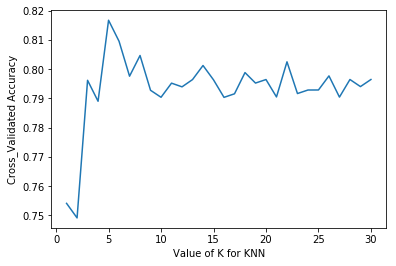

In [34]:
#plot the value of K for KNN(X_axis) versus the cross_validated accuracy(y_axis)
plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross_Validated Accuracy')


In [35]:
classifier=KNeighborsClassifier(n_neighbors=6)
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [36]:
y_pred=classifier.predict(X_test)

In [37]:
print('Accuracy Score:',accuracy_score(y_test,y_pred))

Accuracy Score: 0.7831325301204819


In [38]:
print('the confusion matrix:\n',confusion_matrix(y_test,y_pred))

the confusion matrix:
 [[103  35]
 [ 19  92]]


In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from mlxtend.evaluate import confusion_matrix
from sklearn import metrics

print('precision value:',metrics.precision_score(y_test,y_pred,average='micro'))

precision value: 0.7831325301204819


In [40]:
print('the recall value:',metrics.recall_score(y_test,y_pred,average='micro'))

the recall value: 0.7831325301204819


### Naive Bayes MOdel

In [41]:
from sklearn.naive_bayes import GaussianNB

In [42]:
gnb=GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [43]:
y_pred=gnb.predict(X_test)


In [44]:
from mlxtend.evaluate import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [45]:
print('Accuracy Score:',accuracy_score(y_test,y_pred))

Accuracy Score: 0.7991967871485943


### Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [47]:
y_pred=classifier.predict(X_test)

In [48]:
#Building a Decision Tree

In [49]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
import os

In [50]:
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

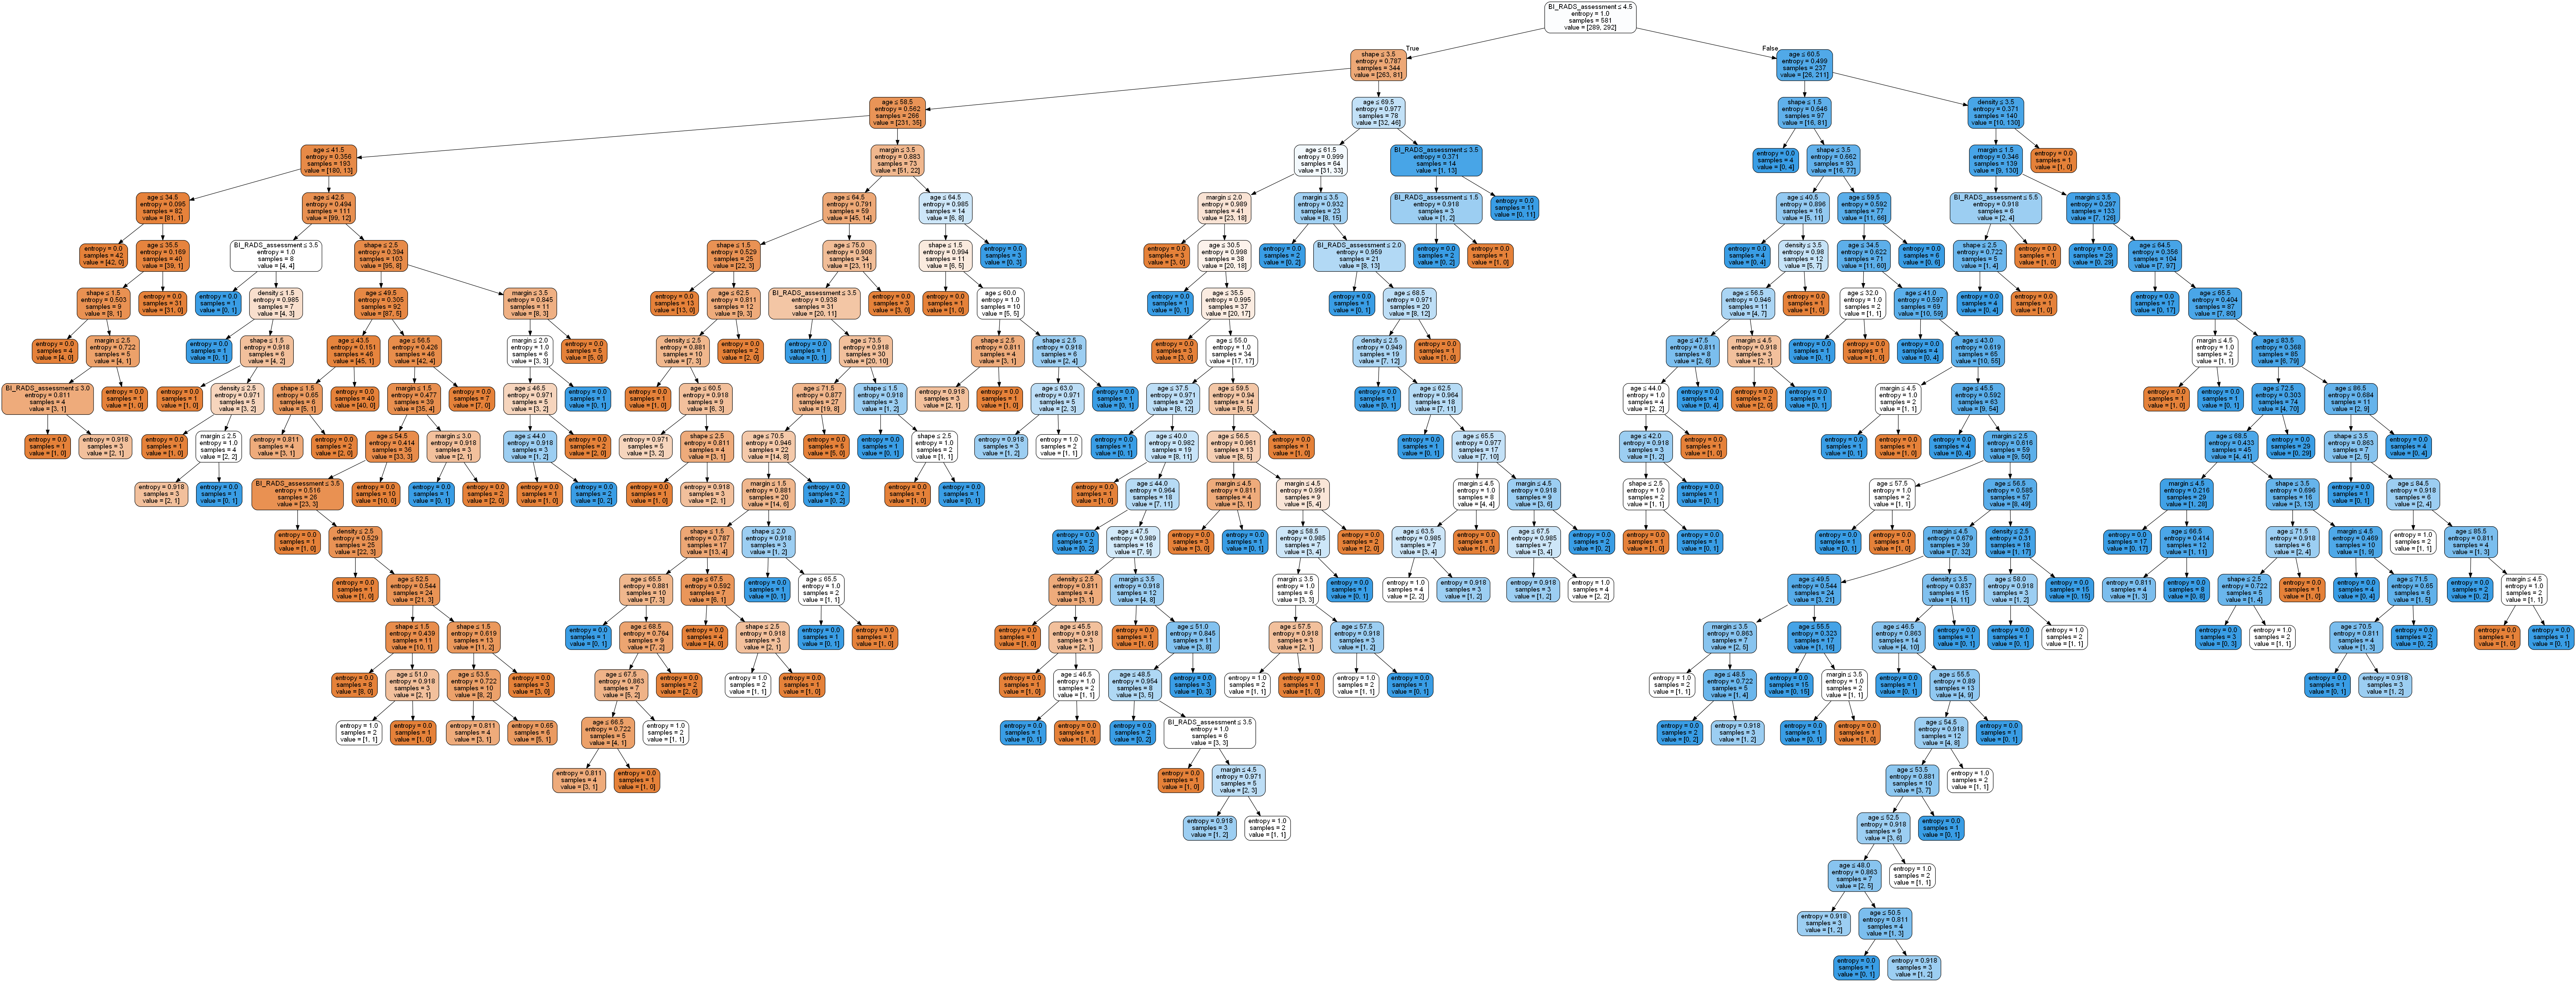

In [51]:
dot_data=StringIO()
export_graphviz(classifier,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=X.columns,
                class_names=None)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('mammogram.png')
Image(graph.create_png())

In [52]:
clf=DecisionTreeClassifier(class_weight=None,
    criterion='entropy',
    splitter='best',
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=3,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=5,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    presort=False
)

In [53]:
#train the mode after pruning the tree
clf=clf.fit(X_train,y_train)

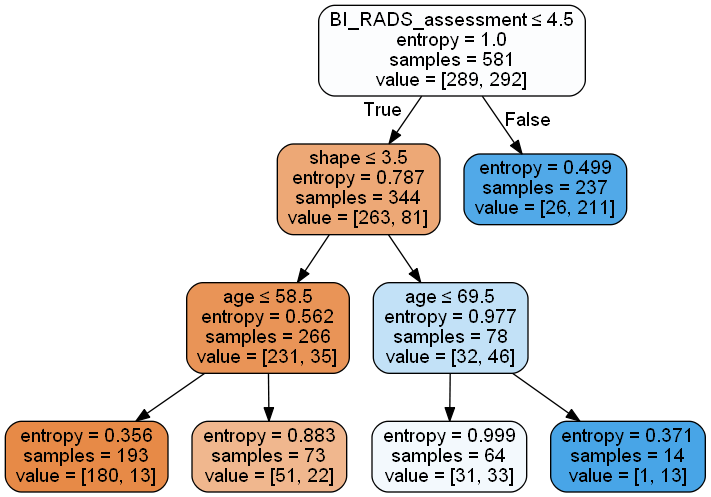

In [54]:
dot_data=StringIO()
export_graphviz(clf,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=X.columns,
                class_names=None)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('iris.png')
Image(graph.create_png())

In [55]:
y_pred=clf.predict(X_test)

In [56]:
print('Accuracy _score:',accuracy_score(y_test,y_pred))

Accuracy _score: 0.8232931726907631


### Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier
 
    #create a Gaussian Classifier
    
clf=RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
)

In [58]:
clf.fit(X_train,y_train)
#predict the model
y_pred=clf.predict(X_test)

In [59]:
y_pred=clf.predict(X_test)
print('Accuracy _score:',accuracy_score(y_test,y_pred))

Accuracy _score: 0.7911646586345381


### Bagging

In [60]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [61]:
kfold = model_selection.KFold(n_splits=10, random_state=21)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=1)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.7855421686746988


In [62]:
 # fit a ensemble.BaggingClassifier() model to the data
model = BaggingClassifier()
model.fit(X_train, y_train)
print(); print(model)


BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False)


In [63]:
y_pred=model.predict(X_test)

In [64]:
from sklearn import metrics
print(); print('ensemble.BaggingClassifier(): ')
print();print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(); print(metrics.classification_report(y_test, y_pred))


ensemble.BaggingClassifier(): 

Accuracy: 0.8072289156626506

              precision    recall  f1-score   support

           0       0.86      0.78      0.82       138
           1       0.75      0.85      0.80       111

   micro avg       0.81      0.81      0.81       249
   macro avg       0.81      0.81      0.81       249
weighted avg       0.81      0.81      0.81       249



### Boosting

In [65]:
#import libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

#### Adaboost Classifier

In [66]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.3,random_state=1)

In [67]:
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
)
classifier.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=200, random_state=None)

In [68]:
y_pred = classifier.predict(X_test)

In [69]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8152610441767069


#### Gradient Descent

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

In [71]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)
    
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_train, y_train)))

Learning rate:  0.05
Accuracy score (training): 0.849
Accuracy score (validation): 0.849
Learning rate:  0.075
Accuracy score (training): 0.849
Accuracy score (validation): 0.849
Learning rate:  0.1
Accuracy score (training): 0.845
Accuracy score (validation): 0.845
Learning rate:  0.25
Accuracy score (training): 0.850
Accuracy score (validation): 0.850
Learning rate:  0.5
Accuracy score (training): 0.859
Accuracy score (validation): 0.859
Learning rate:  0.75
Accuracy score (training): 0.874
Accuracy score (validation): 0.874
Learning rate:  1
Accuracy score (training): 0.859
Accuracy score (validation): 0.859


In [72]:
### Slect the learning rate from the above observation, we considered 0.75

In [73]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))

print();print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

print();print("Classification Report")
print();print(classification_report(y_test,y_pred))

Confusion Matrix:
[[112  26]
 [ 20  91]]

Accuracy: 0.8152610441767069

Classification Report

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       138
           1       0.78      0.82      0.80       111

   micro avg       0.82      0.82      0.82       249
   macro avg       0.81      0.82      0.81       249
weighted avg       0.82      0.82      0.82       249



#### XG boost Classifier

In [74]:
from xgboost import XGBClassifier

classifier = XGBClassifier()
classifier.fit(train_X, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [75]:
y_pred = classifier.predict(X_test)


In [76]:
# Model Accuracy, how well the model performs
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8433734939759037


### Stacking

In [77]:
from vecstack import stacking

from mlxtend.classifier import StackingClassifier

In [78]:
df.head()

,BI_RADS_assessment,age,shape,margin,density,severity
0,5.0,67.0,3.0,5.0,3.0,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
8,5.0,57.0,1.0,5.0,3.0,1
10,5.0,76.0,1.0,4.0,3.0,1


In [79]:
from sklearn import preprocessing
df=df.apply(preprocessing.LabelEncoder().fit_transform)

In [80]:
df.head()

,BI_RADS_assessment,age,shape,margin,density,severity
0,4,49,2,4,2,1
2,4,40,3,4,2,1
3,3,10,0,0,2,0
8,4,39,0,4,2,1
10,4,58,0,3,2,1


In [81]:
y=df['severity']
X=df.drop('severity',1)


In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [83]:
models = [
    KNeighborsClassifier(n_neighbors=5,
                        n_jobs=1),

    RandomForestClassifier(random_state=0, n_jobs=1,
                           n_estimators=100, max_depth=3),

    XGBClassifier(random_state=0, n_jobs=1, learning_rate=0.1,
                  n_estimators=100, max_depth=3)
]

In [84]:
S_train, S_test = stacking(models,
                           X_train, y_train, X_test,
                           regression=False,

                           mode='oof_pred_bag',

                           needs_proba=False,

                           save_dir=None,

                           metric=accuracy_score,

                           n_folds=4,

                           stratified=True,

                           shuffle=True,

                           random_state=0,

                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsClassifier]
    fold  0:  [0.77397260]
    fold  1:  [0.77931034]
    fold  2:  [0.77241379]
    fold  3:  [0.80689655]
    ----
    MEAN:     [0.78314832] + [0.01394751]
    FULL:     [0.78313253]

model  1:     [RandomForestClassifier]
    fold  0:  [0.89041096]
    fold  1:  [0.82758621]
    fold  2:  [0.81379310]
    fold  3:  [0.82068966]
    ----
    MEAN:     [0.83811998] + [0.03058153]
    FULL:     [0.83820998]

model  2:     [XGBClassifier]
    fold  0:  [0.80136986]
    fold  1:  [0.80689655]
    fold  2:  [0.79310345]
    fold  3:  [0.81379310]
    ----
    MEAN:     [0.80379074] + [0.00757912]
    FULL:     [0.80378657]



### converting SL TO UL

In [85]:
#converting from supevised ligression to unsupervised learning
dff=df.copy()

In [86]:
dff.shape

(830, 6)

In [87]:
dff.head()

,BI_RADS_assessment,age,shape,margin,density,severity
0,4,49,2,4,2,1
2,4,40,3,4,2,1
3,3,10,0,0,2,0
8,4,39,0,4,2,1
10,4,58,0,3,2,1


In [88]:
y_act=dff['severity']
X=dff.drop('severity',1)

In [89]:
X.head()

,BI_RADS_assessment,age,shape,margin,density
0,4,49,2,4,2
2,4,40,3,4,2
3,3,10,0,0,2
8,4,39,0,4,2
10,4,58,0,3,2


## KMeans Clustering

In [90]:
from sklearn.cluster import KMeans
from scipy.spatial import distance

In [91]:
#apply scaling
from sklearn.preprocessing import StandardScaler
se=StandardScaler()
z=se.fit_transform(X)

In [92]:
#kmeans for assumption cluster
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3).fit(z)
label=kmeans.labels_ #target variable values
label

array([1, 1, 0, 1, 1, 0, 2, 2, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       0, 0, 2, 2, 2, 0, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 0, 0, 0, 2, 1, 1,
       1, 0, 2, 0, 2, 2, 1, 2, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 2, 0,
       2, 1, 1, 1, 2, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 2, 1,
       1, 1, 0, 1, 1, 0, 2, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 2, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 2, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 2, 0, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 0, 0, 0, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 2, 0, 0, 2, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 2,
       2, 0, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,

In [93]:
centroids=kmeans.cluster_centers_
centroids

array([[-0.65292178, -0.58610398, -0.95497862, -0.98450377,  0.24946052],
       [ 0.49782426,  0.44743969,  0.70655318,  0.754846  ,  0.28521649],
       [-0.22467781, -0.20542001, -0.18499245, -0.36677048, -3.07888863]])

In [94]:
#kmeans clustering in an iteration 1 till 20 cluster size
cluster_range=range(1,20)
cluster_errors=[]

In [95]:
import warnings
warnings.filterwarnings('ignore')
for num_clusters in cluster_range:
    clusters=KMeans(num_clusters)
    clusters.fit(z)
    cluster_errors.append(clusters.inertia_)

In [96]:
#table cluster vs cluster error
clusters_df=pd.DataFrame({'num_clusters':cluster_range,'cluster_errors':cluster_errors})
clusters_df[0:10]

,num_clusters,cluster_errors
0,1,4150.000000
1,2,2504.924709
2,3,1924.360873
3,4,1588.307507
4,5,1403.403527
5,6,1265.631916
6,7,1147.791266
7,8,1065.675486
8,9,961.370963
9,10,924.434200


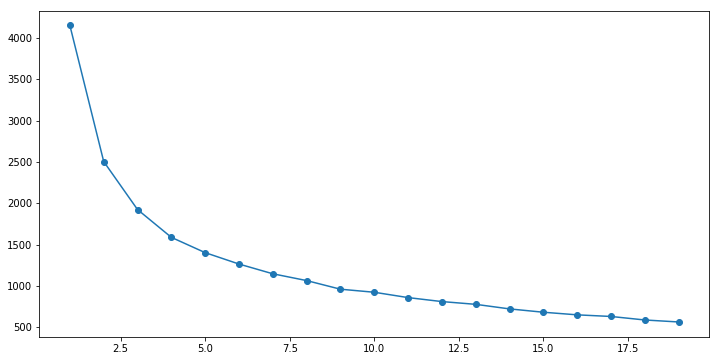

In [97]:
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters,clusters_df.cluster_errors,marker="o")

In [98]:
kmeans=KMeans(n_clusters=5).fit(z)
label1=kmeans.labels_ #target variable values
label1

array([3, 3, 1, 3, 3, 1, 2, 2, 4, 0, 4, 4, 2, 3, 0, 3, 3, 3, 2, 3, 3, 2,
       4, 4, 2, 2, 2, 4, 2, 3, 3, 2, 3, 2, 3, 3, 0, 3, 4, 1, 4, 2, 3, 3,
       3, 1, 2, 4, 2, 2, 0, 2, 4, 3, 3, 0, 0, 4, 3, 3, 1, 4, 0, 3, 2, 4,
       2, 3, 3, 3, 2, 4, 3, 2, 3, 3, 3, 3, 3, 3, 0, 3, 4, 3, 3, 4, 2, 3,
       3, 0, 1, 3, 3, 4, 2, 0, 0, 3, 1, 1, 1, 3, 4, 4, 3, 3, 1, 0, 0, 4,
       3, 2, 3, 3, 0, 3, 1, 2, 3, 3, 3, 3, 1, 3, 4, 1, 4, 3, 1, 3, 2, 4,
       4, 0, 0, 0, 0, 3, 1, 0, 2, 4, 1, 3, 1, 0, 4, 1, 1, 1, 3, 3, 4, 0,
       3, 4, 1, 0, 3, 3, 4, 3, 3, 0, 0, 2, 3, 4, 1, 1, 3, 1, 1, 3, 1, 1,
       1, 2, 1, 0, 3, 3, 3, 2, 3, 3, 1, 4, 3, 0, 3, 0, 3, 3, 3, 3, 3, 2,
       0, 4, 3, 4, 1, 1, 2, 4, 0, 0, 0, 3, 3, 3, 2, 3, 0, 0, 3, 0, 0, 3,
       3, 4, 2, 4, 4, 2, 1, 1, 1, 0, 3, 0, 0, 0, 1, 0, 4, 0, 0, 3, 1, 2,
       2, 1, 2, 2, 0, 3, 3, 4, 3, 3, 0, 3, 3, 3, 0, 3, 4, 1, 1, 4, 3, 0,
       3, 3, 1, 1, 1, 1, 3, 1, 1, 4, 3, 0, 3, 1, 3, 4, 1, 1, 3, 3, 0, 3,
       1, 3, 1, 3, 3, 0, 4, 3, 3, 1, 4, 0, 4, 3, 3,

In [99]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from mlxtend.evaluate import confusion_matrix

In [100]:
#confusion Matrix
confusion_matrix(y_act,label1)

array([[ 84, 148,  44,  27, 124],
       [ 77,  14,  23, 264,  25],
       [  0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0]])

In [101]:
# to prepare a confusion matrix, the two target variables , no need to be in same type
print(y_act.shape, type(y_act))
print(label.shape,type(label))


(830,) <class 'pandas.core.series.Series'>
(830,) <class 'numpy.ndarray'>


In [102]:
accuracy_score(y_act,label1)

0.1180722891566265

#### HIREARCHICAL CLUSTERING(Agglometrative clustering)

In [103]:
from scipy.cluster.hierarchy import dendrogram,linkage
dff.head()

,BI_RADS_assessment,age,shape,margin,density,severity
0,4,49,2,4,2,1
2,4,40,3,4,2,1
3,3,10,0,0,2,0
8,4,39,0,4,2,1
10,4,58,0,3,2,1


In [104]:
y=df['severity']
X=df.drop('severity',1)

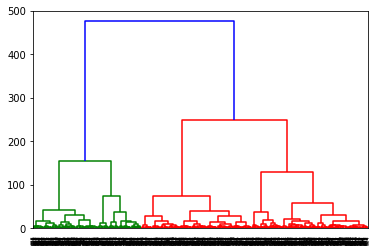

In [105]:
Z=linkage(X,'ward')#single ,complete, average,centroid,wards
dendrogram(Z,labels=X.index,leaf_rotation=90)
plt.show()

In [106]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
label2=cluster.fit_predict(X)
label2

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,

In [107]:
label2.shape

(830,)

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [65.0, 65.0, 75.0, 75.0],
  [42.5, 42.5, 70.0, 70.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [85.0, 85.0, 102.5, 102.5],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [93.75, 93.75, 132.5, 132.5],
  [56.25, 56.25, 113.125, 113.125],
  [155.0, 155.0, 165.0, 165.0],
  [175.0, 175.0, 185.0, 185.0],
  [195.0, 195.0, 205.0, 205.0],
  [180.0, 180.0, 200.0, 200.0],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [222.5, 222.5, 252.5, 252.5],
  [190.0, 190.0, 237.5, 237.5],
  [160.0, 160.0, 213.75, 213.75],
  [84.6875, 84.6875, 186.875, 186.875],
  [12.5, 12.5, 135.78125, 135.78125],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [285.0, 285.0, 302.5, 302.5],
  [275.0, 275.0, 293.75, 293.75],
  [335.0, 335.0, 345.0, 345.0],
  [385

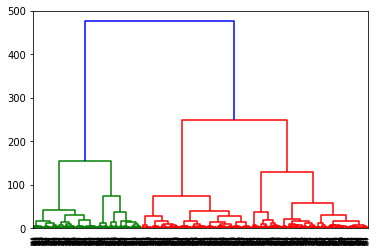

In [108]:
from scipy.cluster.hierarchy import dendrogram,linkage
linked=linkage(X,'ward')
dendrogram(linked,leaf_rotation=90)

In [109]:
print('the confusion matrix:\n',confusion_matrix(y_act,label2))

the confusion matrix:
 [[214 213]
 [348  55]]


In [110]:
print('Accuracy score:',accuracy_score(y_act,label2))

Accuracy score: 0.3240963855421687


In [111]:
## by comparing the KMeans cluster and Hirearchy accuracy scores we get the highest to  KMeans cluster viz=4%

#### Again concanting with main data with the highest accuracy i.e label1 in KMeans Cluster

In [112]:
again=pd.DataFrame(label2,columns=["label"])
again.head()
again.shape

(830, 1)

In [113]:
dff.shape

(830, 6)

In [114]:
dff=df.copy()
dff.severity.value_counts()
dff=dff.set_index(np.arange(0,830))
dff.head()

,BI_RADS_assessment,age,shape,margin,density,severity
0,4,49,2,4,2,1
1,4,40,3,4,2,1
2,3,10,0,0,2,0
3,4,39,0,4,2,1
4,4,58,0,3,2,1


In [115]:
again

,label
0,0
1,0
2,1
3,0
4,0
5,1
6,1
7,0
8,0
9,0


In [116]:
dff['label']=again

In [117]:
dff.drop('severity',1)
dff

,BI_RADS_assessment,age,shape,margin,density,severity,label
0,4,49,2,4,2,1,0
1,4,40,3,4,2,1,0
2,3,10,0,0,2,0,1
3,4,39,0,4,2,1,0
4,4,58,0,3,2,1,0
5,2,24,1,0,2,1,1
6,3,18,2,0,1,0,1
7,3,42,1,0,1,0,0
8,3,36,0,0,2,0,0
9,2,34,2,3,2,0,0


In [118]:
dff.shape

(830, 7)

In [119]:
(dff.isnull().sum())/len(dff)

BI_RADS_assessment    0.0
age                   0.0
shape                 0.0
margin                0.0
density               0.0
severity              0.0
label                 0.0
dtype: float64

In [120]:
dff.describe().T

,count,mean,std,min,25%,50%,75%,max
BI_RADS_assessment,830.0,3.342169,0.659736,0.0,3.0,3.0,4.0,6.0
age,830.0,37.739759,14.581322,0.0,28.0,39.0,48.0,71.0
shape,830.0,1.781928,1.242361,0.0,1.0,2.0,3.0,3.0
margin,830.0,1.813253,1.567175,0.0,0.0,2.0,3.0,4.0
density,830.0,1.915663,0.350936,0.0,2.0,2.0,2.0,3.0
severity,830.0,0.485542,0.500092,0.0,0.0,0.0,1.0,1.0
label,830.0,0.322892,0.467864,0.0,0.0,0.0,1.0,1.0


In [121]:
# df.dropna(inplace=True)

In [122]:
dff.shape

(830, 7)

In [123]:
y=dff['label']
X=dff.drop('label',1)


In [124]:
X.head()

,BI_RADS_assessment,age,shape,margin,density,severity
0,4,49,2,4,2,1
1,4,40,3,4,2,1
2,3,10,0,0,2,0
3,4,39,0,4,2,1
4,4,58,0,3,2,1


In [125]:
#Train_test splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape,y_test.shape)

(622, 6) (622,)
(208, 6) (208,)


### Logistic Model

In [126]:
from sklearn.linear_model import LogisticRegression

In [127]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [128]:
y_pred=lr.predict(X_test)

In [129]:
#Model Evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from mlxtend.evaluate import confusion_matrix

In [130]:
cm=confusion_matrix(y_test,y_pred,binary=True)
cm

array([[145,   1],
       [  4,  58]])

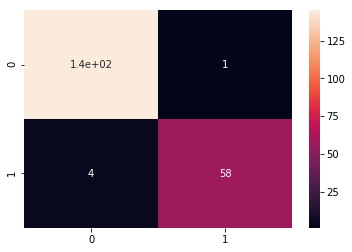

In [131]:
sns.heatmap(cm,annot=True)

TP=61,FN=103,TN=8,FP=4

In [132]:
print('classification_report:',classification_report(y_test,y_pred))

classification_report:               precision    recall  f1-score   support

           0       0.97      0.99      0.98       146
           1       0.98      0.94      0.96        62

   micro avg       0.98      0.98      0.98       208
   macro avg       0.98      0.96      0.97       208
weighted avg       0.98      0.98      0.98       208



In [133]:
print('Accuracy_score:',accuracy_score(y_test,y_pred))

Accuracy_score: 0.9759615384615384


### KNN Model

In [134]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [135]:
y_pred=classifier.predict(X_test)

In [136]:
#model evaluation
from mlxtend.evaluate import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [137]:
print('Accuracy Score:',accuracy_score(y_test,y_pred))

Accuracy Score: 1.0


In [138]:
#K value
from sklearn.model_selection import cross_val_score

In [139]:
k_range=range(1,31)#list of scores from k_range
k_scores=[]
#1.we will loop through resonable values of k
for k in k_range:
   #2.run KNeighborsClassifier with k neighbours
   knn=KNeighborsClassifier(n_neighbors=k)
   #3.Obtain cross_val_score for KNeighborsClassifier with k neighbours
   scores=cross_val_score(knn,X,y,cv=10,scoring='accuracy')
   #4.append mean of scores for k neighbors to k_scores list
   k_scores.append(scores.mean())
print(k_scores)

[0.9975756685277697, 0.998780487804878, 0.9975900116144019, 0.9975900116144019, 0.9915512223108461, 0.9927560415879547, 0.9915365293928329, 0.9939465177784308, 0.9939465177784308, 0.9963414634146343, 0.9915365293928329, 0.995150987224158, 0.9915365293928329, 0.9939465177784308, 0.9915365293928329, 0.9927270055833087, 0.9915221863062005, 0.9915221863062005, 0.9915221863062005, 0.9915221863062005, 0.9915221863062005, 0.9939465177784308, 0.9927270055833087, 0.9939318248604174, 0.9939465177784308, 0.9975609756097562, 0.9975609756097562, 0.9975609756097562, 0.9975609756097562, 0.9975609756097562]


Text(0, 0.5, 'Cross_Validated Accuracy')

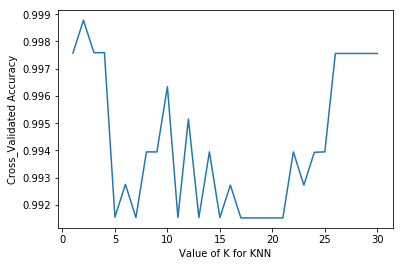

In [140]:
#plot the value of K for KNN(X_axis) versus the cross_validated accuracy(y_axis)
plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross_Validated Accuracy')


In [141]:
classifier=KNeighborsClassifier(n_neighbors=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [142]:
y_pred=classifier.predict(X_test)

In [143]:
print('Accuracy Score:',accuracy_score(y_test,y_pred))

Accuracy Score: 1.0


In [144]:
print('the confusion matrix:\n',confusion_matrix(y_test,y_pred))

the confusion matrix:
 [[146   0]
 [  0  62]]


In [145]:
print('precision value:',metrics.precision_score(y_test,y_pred,average='micro'))

precision value: 1.0


In [146]:
print('the recall value:',metrics.recall_score(y_test,y_pred,average='micro'))

the recall value: 1.0


### Naive Bayes Model

In [147]:
# import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

In [148]:
gnb=GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [149]:
y_pred=gnb.predict(X_test)


In [150]:
from mlxtend.evaluate import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [151]:
print('Accuracy Score:',accuracy_score(y_test,y_pred))

Accuracy Score: 0.8798076923076923


### Decision Tree

In [152]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [153]:
y_pred=classifier.predict(X_test)

In [154]:
#Building a Decision Tree

In [155]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
import os

In [156]:
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

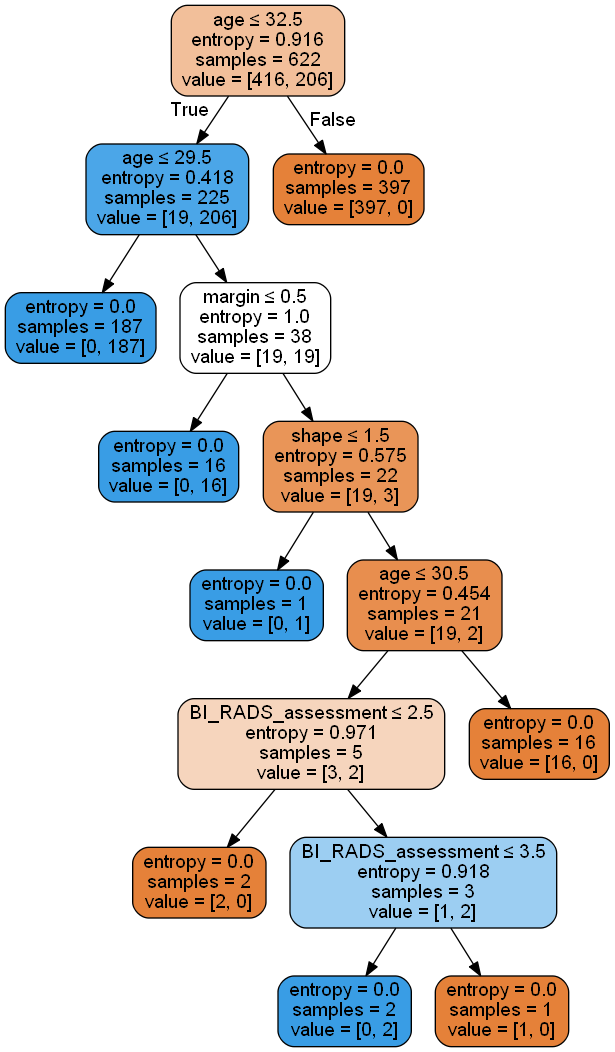

In [157]:
dot_data=StringIO()
export_graphviz(classifier,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=X.columns,
                class_names=None)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('mammogram.png')
Image(graph.create_png())

In [158]:
clf=DecisionTreeClassifier(class_weight=None,
    criterion='entropy',
    splitter='best',
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=3,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=5,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    presort=False
)

In [159]:
#train the mode after pruning the tree
clf=clf.fit(X_train,y_train)

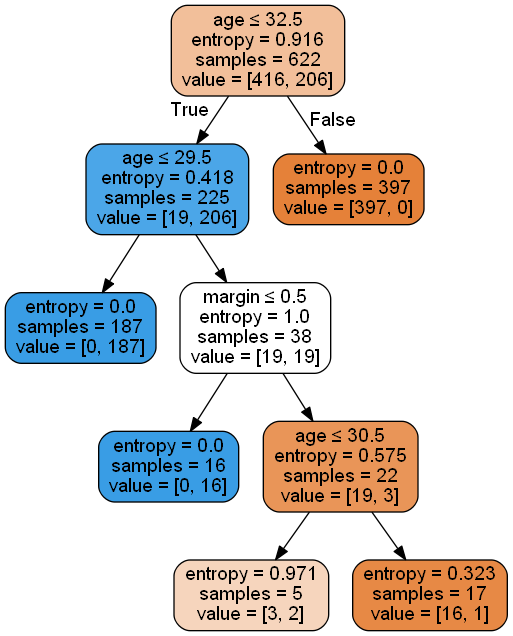

In [160]:
dot_data=StringIO()
export_graphviz(clf,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=X.columns,
                class_names=None)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('iris.png')
Image(graph.create_png())

In [161]:
y_pred=clf.predict(X_test)

In [162]:
print('Accuracy _score:',accuracy_score(y_test,y_pred))

Accuracy _score: 1.0


### Random Forest

In [163]:
from sklearn.ensemble import RandomForestClassifier
 
    #create a Gaussian Classifier
    
clf=RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
)

In [164]:
clf.fit(X_train,y_train)
#predict the model
y_pred=clf.predict(X_test)

In [165]:
y_pred=clf.predict(X_test)
print('Accuracy _score:',accuracy_score(y_test,y_pred))

Accuracy _score: 1.0


### Stacking

In [166]:
from vecstack import stacking

from mlxtend.classifier import StackingClassifier

In [167]:
dff.head()

,BI_RADS_assessment,age,shape,margin,density,severity,label
0,4,49,2,4,2,1,0
1,4,40,3,4,2,1,0
2,3,10,0,0,2,0,1
3,4,39,0,4,2,1,0
4,4,58,0,3,2,1,0


In [168]:
y=dff['label']
X=dff.drop('label',1)

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [170]:
models = [
    KNeighborsClassifier(n_neighbors=5,
                        n_jobs=1),

    RandomForestClassifier(random_state=0, n_jobs=1,
                           n_estimators=100, max_depth=3),

    XGBClassifier(random_state=0, n_jobs=1, learning_rate=0.1,
                  n_estimators=100, max_depth=3)
]

In [171]:
S_train, S_test = stacking(models,
                           X_train, y_train, X_test,
                           regression=False,

                           mode='oof_pred_bag',

                           needs_proba=False,

                           save_dir=None,

                           metric=accuracy_score,

                           n_folds=4,

                           stratified=True,

                           shuffle=True,

                           random_state=0,

                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsClassifier]
    fold  0:  [0.99315068]
    fold  1:  [1.00000000]
    fold  2:  [0.99310345]
    fold  3:  [0.97931034]
    ----
    MEAN:     [0.99139112] + [0.00751808]
    FULL:     [0.99139415]

model  1:     [RandomForestClassifier]
    fold  0:  [1.00000000]
    fold  1:  [1.00000000]
    fold  2:  [1.00000000]
    fold  3:  [0.99310345]
    ----
    MEAN:     [0.99827586] + [0.00298629]
    FULL:     [0.99827883]

model  2:     [XGBClassifier]
    fold  0:  [1.00000000]
    fold  1:  [0.99310345]
    fold  2:  [0.99310345]
    fold  3:  [0.98620690]
    ----
    MEAN:     [0.99310345] + [0.00487660]
    FULL:     [0.99311532]



#### Random Forest without scaling with PCA

In [172]:
 dff.head()

,BI_RADS_assessment,age,shape,margin,density,severity,label
0,4,49,2,4,2,1,0
1,4,40,3,4,2,1,0
2,3,10,0,0,2,0,1
3,4,39,0,4,2,1,0
4,4,58,0,3,2,1,0


In [173]:
dff.isnull().sum()

BI_RADS_assessment    0
age                   0
shape                 0
margin                0
density               0
severity              0
label                 0
dtype: int64

In [174]:
y=dff.label
X=dff.drop('label',1)

In [175]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [176]:
#Apply PCA
from sklearn.decomposition import PCA

In [177]:
#PCA for all features
pca=PCA()
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

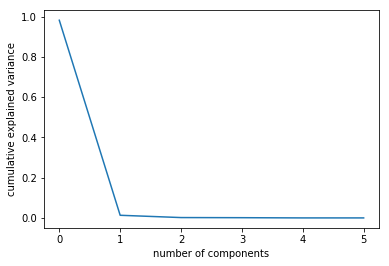

In [178]:

#Explained variance
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [179]:
## applying Random Forest
from sklearn.ensemble import RandomForestClassifier
 
    #create a Gaussian Classifier
    
clf=RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
)

In [180]:
clf.fit(X_train,y_train)
#predict the model
y_pred=clf.predict(X_test)

In [181]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from mlxtend.evaluate import confusion_matrix
y_pred=clf.predict(X_test)
print('Accuracy _score:',accuracy_score(y_test,y_pred))

Accuracy _score: 0.9939759036144579


inference: the accuracy percentage has decreased from 1.0 to 0.9879518072289156  after performing the PCA
 

#### Building a model With scaling ,PCA,Random Forest

In [182]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [183]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

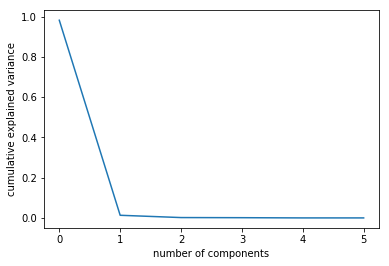

In [184]:
#Explained variance
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [185]:
from sklearn.ensemble import RandomForestClassifier
 
    #create a Gaussian Classifier
    
clf=RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
)

In [186]:
clf.fit(X_train,y_train)
#predict the model
y_pred=clf.predict(X_test)

In [187]:
y_pred=clf.predict(X_test)
print('Accuracy _score:',accuracy_score(y_test,y_pred))

Accuracy _score: 1.0


Inference: The accuracy doesn't change with scaling ,PCA even without scaling and PCA. viz 1.0,

CONCLUSION: Hence we consider the model 3 as the best model though it contains the one feature or component it gives the best accuracy score instead of considering the 6 components like model1 i.e without scaling and PCA